# PRODUCT RECOMMENDATION 

In [2]:
#import needed libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
# Load the dataset
df = pd.read_csv("product recommendation.csv")
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Total_Purchases,Category_Electronics,Category_Fashion,Category_Groceries,Category_Home_Appliances,Category_Health
0,C001,25,40000,35,5,1,0,1,0,0
1,C002,32,60000,65,10,0,1,1,1,0
2,C003,45,80000,80,15,1,1,0,1,1
3,C004,28,45000,40,6,0,1,1,0,0
4,C005,35,70000,85,18,1,0,0,1,1


In [18]:
# Select relevant features for clustering
X = df[['Annual_Income', 'Spending_Score', 'Total_Purchases', 
        'Category_Electronics', 'Category_Fashion', 'Category_Groceries', 
        'Category_Home_Appliances', 'Category_Health']]

# Scale the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\jupyter notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


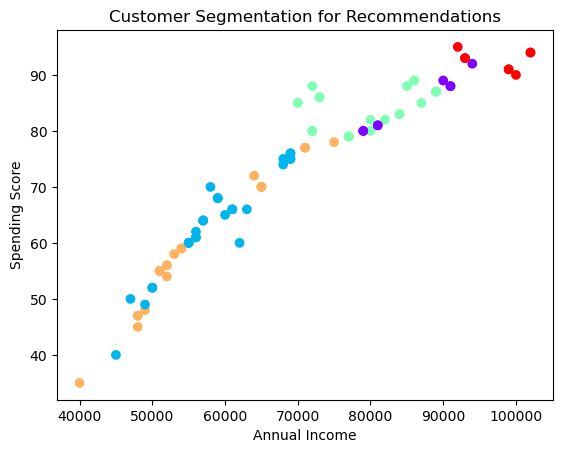

In [20]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation for Recommendations")
plt.show()

In [6]:
# Find the most popular product category in each cluster
cluster_categories = df.groupby("Cluster")[['Category_Electronics', 'Category_Fashion', 
                                            'Category_Groceries', 'Category_Home_Appliances', 
                                            'Category_Health']].sum()

# Recommend top category per cluster
recommendations = cluster_categories.idxmax(axis=1)
print("Recommended Product Categories for Each Cluster:")
print(recommendations)


Recommended Product Categories for Each Cluster:
Cluster
0    Category_Electronics
1        Category_Fashion
2    Category_Electronics
3    Category_Electronics
4    Category_Electronics
dtype: object
